<a href="https://colab.research.google.com/github/prunojumah/Independent_Project_Week_9/blob/main/Independent_Project_Week9_Pruno_Jumah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Research Question

The dataset available contains data on individuals who boarded a plane/ship enroute their journey ended up crashing/capsizing.

The core objetive of this project is to perhaps create a model that predicts which passengers are likely to survive on deck putting the various variables in to consideration.


The project will go on to identify the most important features among the given variables that highly influences a person's chances of survival.

## Defining the metric of success

1. The model should achieve at least 80% accuracy.
2. The confusion matrix should have the lowest possible false positives and false negatives.

## Data Understanding

Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

name -Name

survival - Whether a passenger survived (0 = No*; 1 = Yes*)

sex - Sex

age - Age

sibsp*

parch*

ticket - Ticket Number

fare - Amount of Fare 

cabin - Cabin stationed

embarked - Port of departure 

## Recording experimental design

Randomly partition each dataset into two parts i.e 80 - 20  sets.

For dataset 1, because we don't have the label for the test set, we will use the train set to create train and test data (i.e. splitting further), then perform K-nearest neighbor classification.

For dataset 2, perform classification of the testing set samples using the Naive Bayes Classifier.

Compute the accuracy (percentage of correct classification).

Report the confusion matrix of each classifier.

Repeat step 2 to step 4 twice, each time splitting the datasets differently i.e. 70-30, 60-40, then note the outcomes of your modeling.

Suggest and apply at least one of the optimization techniques that you learned earlier this week.

Provide further recommendations to improve both classifiers.

## Data relevance

How relevant was the data provided suited to achieving the desired objective?

Was the objective of the project achieved? or should there be additional data and/or information.

## Importing the libraries




In [178]:
import pandas as pd

import numpy as np

import seaborn as sb

from sklearn import metrics

import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LinearRegression

from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt

from sklearn.metrics import f1_score

from IPython.core.pylabtools import figsize

from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

from sklearn.metrics import mean_squared_error,r2_score,accuracy_score,f1_score,classification_report

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Loading and checking the data


In [179]:
# Previewing the head of the dataset

data_train = pd.read_csv('/content/train (5).csv')
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [180]:
# Previewing the tail of the dataset

data_test = pd.read_csv('/content/test (1).csv')
data_test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [181]:
# Previewing the head of the dataset

data_test = pd.read_csv('/content/train (5).csv')
data_test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [182]:
# Previewing the tail of the dataset

data_train = pd.read_csv('/content/train (5).csv')
data_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [183]:
# Printing the data_train columns

print(data_train.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [184]:
# Printing the data_test columns

print(data_test.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [185]:
# Checking the info of both datasets

print(data_train.info())
print(data_test.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Sur

In [186]:
# Checking the shapes of the datasets

data_train.shape

(891, 12)

In [187]:
data_test.shape

# Both the datasets have an equal number of entries

(891, 12)

In [188]:
# Describing the two datasets to get statistical analysis

data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [189]:
data_test.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Data cleaning

Checking if the data types for the columns are correct


In [190]:
data_test.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [191]:
data_train.dtypes

# passenger id, survived and pclass columns 
# are set as numeric columns while they represent categorical feature types
# Passenger id will not be used it will therefore be dropped. This

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [192]:
data_train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [193]:

# Checking the unique values in each column using a for loop


for column in data_train.columns:
  print(column)
  print(data_train[column].unique())
  print(data_train[column].nunique())
  print('\n')

PassengerId
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 24

In [194]:

# Checking the unique values in each column using a for loop


for column in data_test.columns:
  print(column)
  print(data_test[column].unique())
  print(data_test[column].nunique())
  print('\n')

PassengerId
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 24

In [195]:
# dropping the passenger id and ticket columns due to the high cardinality

data_train = data_train.drop( ['PassengerId', 'Ticket'] , axis = 1)
data_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


In [196]:
# dropping the passenger id and ticket columns due to high cardinality

data_test = data_test.drop( ['PassengerId', 'Ticket'] , axis = 1)
data_test.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


Checking for null values

In [197]:
# Checking for missing values per column in data_train

data_train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [198]:
# Checking for missing values per column in data_test

data_test.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [199]:
# Checking for null values in data_train
 
data_train.isnull().sum().sum()

866

In [200]:
# Checking for null values in data_test

data_test.isnull().sum().sum()

# Both have 866 missing entries in their datasets

866

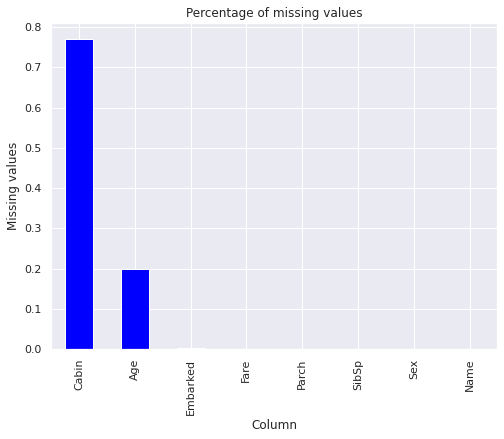

In [201]:
# Visualising missing values

data_train.isna().mean().round(4).sort_values(ascending = False)[:8].plot(kind = 'bar', figsize = (8, 6), color = 'blue')
plt.title('Percentage of missing values')
plt.ylabel('Missing values')
plt.xlabel('Column')
plt.show()

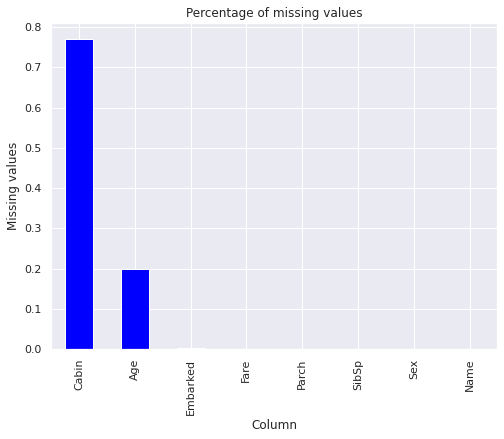

In [202]:
# Visualising missing values

data_test.isna().mean().round(4).sort_values(ascending = False)[:8].plot(kind = 'bar', figsize = (8, 6), color = 'blue')
plt.title('Percentage of missing values')
plt.ylabel('Missing values')
plt.xlabel('Column')
plt.show()

In [203]:
# Replacing missing values with appropriate data
# Column age has 177 null entries, which will be replaced with the mean of 
# the available data

data_train['Age']= data_train['Age'].fillna(data_train['Age'].mean(), axis = 0)

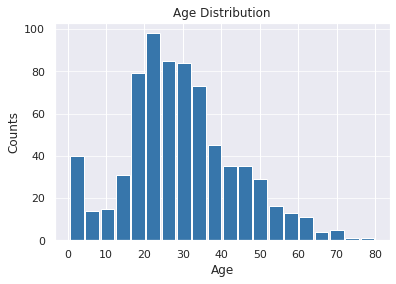

In [204]:
#visualizing age dirstibution

size, scale = 1000, 10
age = data_test['Age']

age.plot.hist(grid=True, bins=20, rwidth=0.9, color='#3776ab')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)

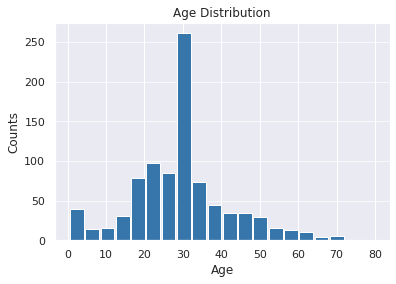

In [205]:
# visualizing age dirstibution

size, scale = 1000, 10
age = data_train['Age']

age.plot.hist(grid=True, bins=20, rwidth=0.9, color='#3776ab')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)

From the distribution plots above, it is evident that the age distribution is normal as a lot of counts are close to the mean age

In [206]:
# The cabin column has 687 missing values.
# we will use the fare column to calculate the missing values

print(data_train.Cabin.isnull().sum())
data_train.Cabin.nunique()


687


147

In [207]:
# Grouping the data by cabin and then the fare paid

data_train.groupby("Cabin")['Fare'].mean().sort_values()

Cabin
B102                 0.0000
B94                  0.0000
A36                  0.0000
F G63                7.6500
F G73                7.6500
                     ...   
B58 B60            247.5208
B51 B53 B55        258.6646
B57 B59 B63 B66    262.3750
C23 C25 C27        263.0000
B101               512.3292
Name: Fare, Length: 147, dtype: float64

In [208]:
# Assigning the null values to Z

data_train.Cabin.fillna("Z", inplace=True)

In [209]:
# Reducing the column names to only 1 letter

data_train.Cabin = [i[0] for i in data_train.Cabin]

In [210]:
# Obtaining the mean score of the various cabins

data_train.groupby("Cabin")['Fare'].mean().sort_values()

Cabin
G     13.581250
F     18.696792
Z     19.157325
T     35.500000
A     39.623887
E     46.026694
D     57.244576
C    100.151341
B    113.505764
Name: Fare, dtype: float64

In [211]:
# Creating a function to compute the cabin values using the fare column

def cabin_fn(i):
    
    #initializing as 0
    a = 0
    if i<14:
        a = "G"
    elif i>=14 and i<19:
        a = "F"
    elif i>=19 and i<20:
        a = "N"
    elif i>=20 and i<35:
        a = "T"
    elif i>= 35 and i<40:
        a = "A"
    elif i>= 40 and i<46:
        a = "E"
    elif i>=47 and i<57:
        a = 'D'
    elif i>=58 and i<100:
        a = 'C'
    else:
        a = "B"
    return a

In [212]:
# Confirming the replacement of null values

data_train.Cabin.isnull().sum()

# 0 indicates successful replacement of null values

0

In [213]:
# Checking for missing values in the embarked column

data_train[data_train.Embarked.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
61,1,1,"Icard, Miss. Amelie",female,38.0,0,0,80.0,B,NaN
829,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,80.0,B,NaN


Text(0.5, 1.0, 'Test Set')

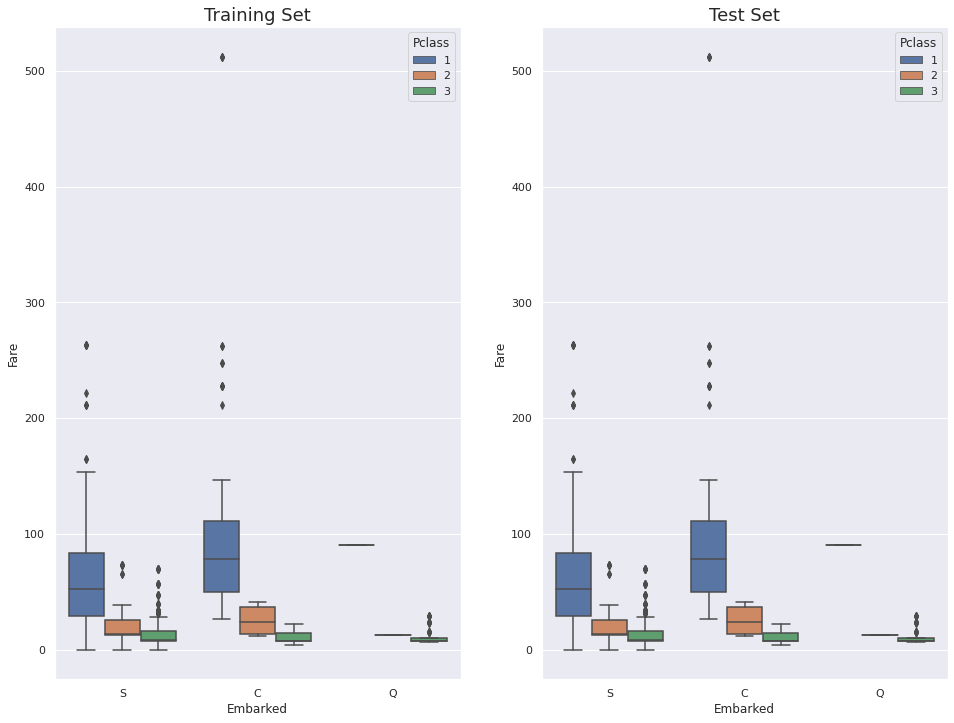

In [214]:
# Finding the appropriate replacement of the null values
# Since their entries have similar attributes i.e survived, Pclass, Cabin etc

import seaborn as sns

sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(16,12),ncols=2)
ax1 = sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=data_train, ax = ax[0]);
ax2 = sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=data_test, ax = ax[1]);
ax1.set_title("Training Set", fontsize = 18)
ax2.set_title('Test Set',  fontsize = 18)


In [215]:
# most of the passengers who paid an average fare of 80$ had 
# type 'C' on the embarked column thus we replace the null vales with C.
# Replacing the null values in the Embarked column with C. 

data_train.Embarked.fillna("C", inplace=True)

In [216]:
# Confirming the replacement of null values

data_train.Embarked.isnull().sum()

# 0 indicates successful replacement of null values

0

## Univariate Analysis


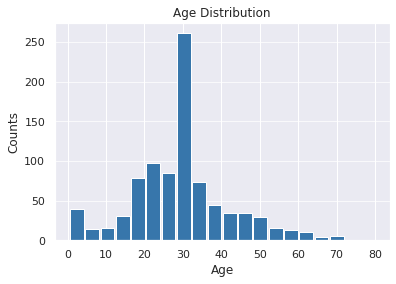

In [217]:
# visualizing age dirstibution

size, scale = 1000, 10
age = data_train['Age']

age.plot.hist(grid=True, bins=20, rwidth=0.9, color='#3776ab')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)

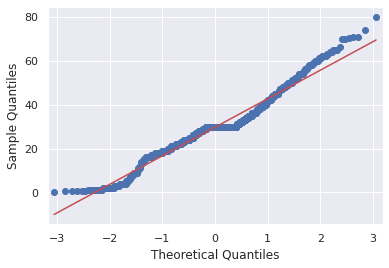

In [218]:
# Perfoming a normality test using a q-q plot

from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

data = data_train['Age']
qqplot(data, line='s')
pyplot.show()

# The q-q plot confirms that it follows a normal distribution.

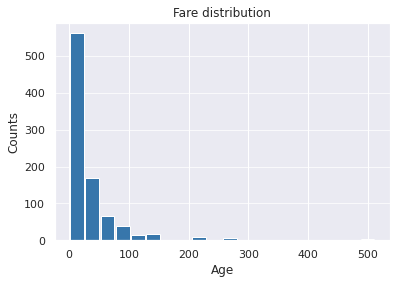

In [219]:
# visualizing Fare dirstibution

size, scale = 1000, 10
age = data_train['Fare']

age.plot.hist(grid=True, bins=20, rwidth=0.9, color='#3776ab')
plt.title('Fare distribution')
plt.xlabel('Age')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)

# The fare distribution is highly skewed to the right implying that the
# the mean is less than the median and the modal.

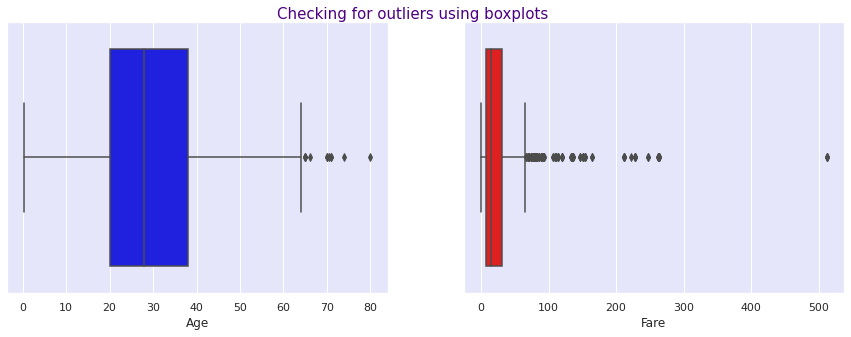

In [220]:

# Using a boxplot to check for outliers
# Creating a list of columns to check for outliers
# Creating a list of colors

import seaborn as sns
cols = ['Age', 'Fare']
colors = ['blue','red']

# Plotting boxplots of the col_list columns to check for outliers
#
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))
plt.suptitle('Checking for outliers using boxplots', fontsize = 15, y = 0.92, color = 'indigo')
for ax, data, column, color in zip(axes.flatten(), data_test, cols, colors):
  sns.boxplot(data_test[column], ax = ax, color = color)
  ax.set_facecolor('lavender')
  
# Setting the background color to lavender
# The boxplots indicate presence of outliers.

Categorical columns

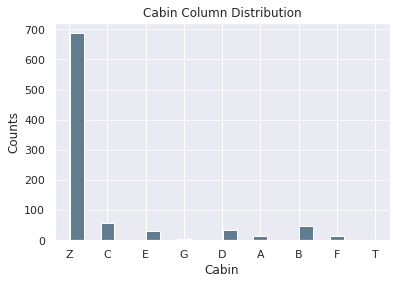

In [221]:
# Visualizing Cabin distribution

size, scale = 1000, 10
age = data_train['Cabin']

age.hist(grid=True, bins=20, rwidth=0.9,color='#607c8e')
plt.title('Cabin Column Distribution')
plt.xlabel('Cabin')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)

# The cabin with the highest number of people was cabin z
# While cabin T and G hardly had anyone aboard

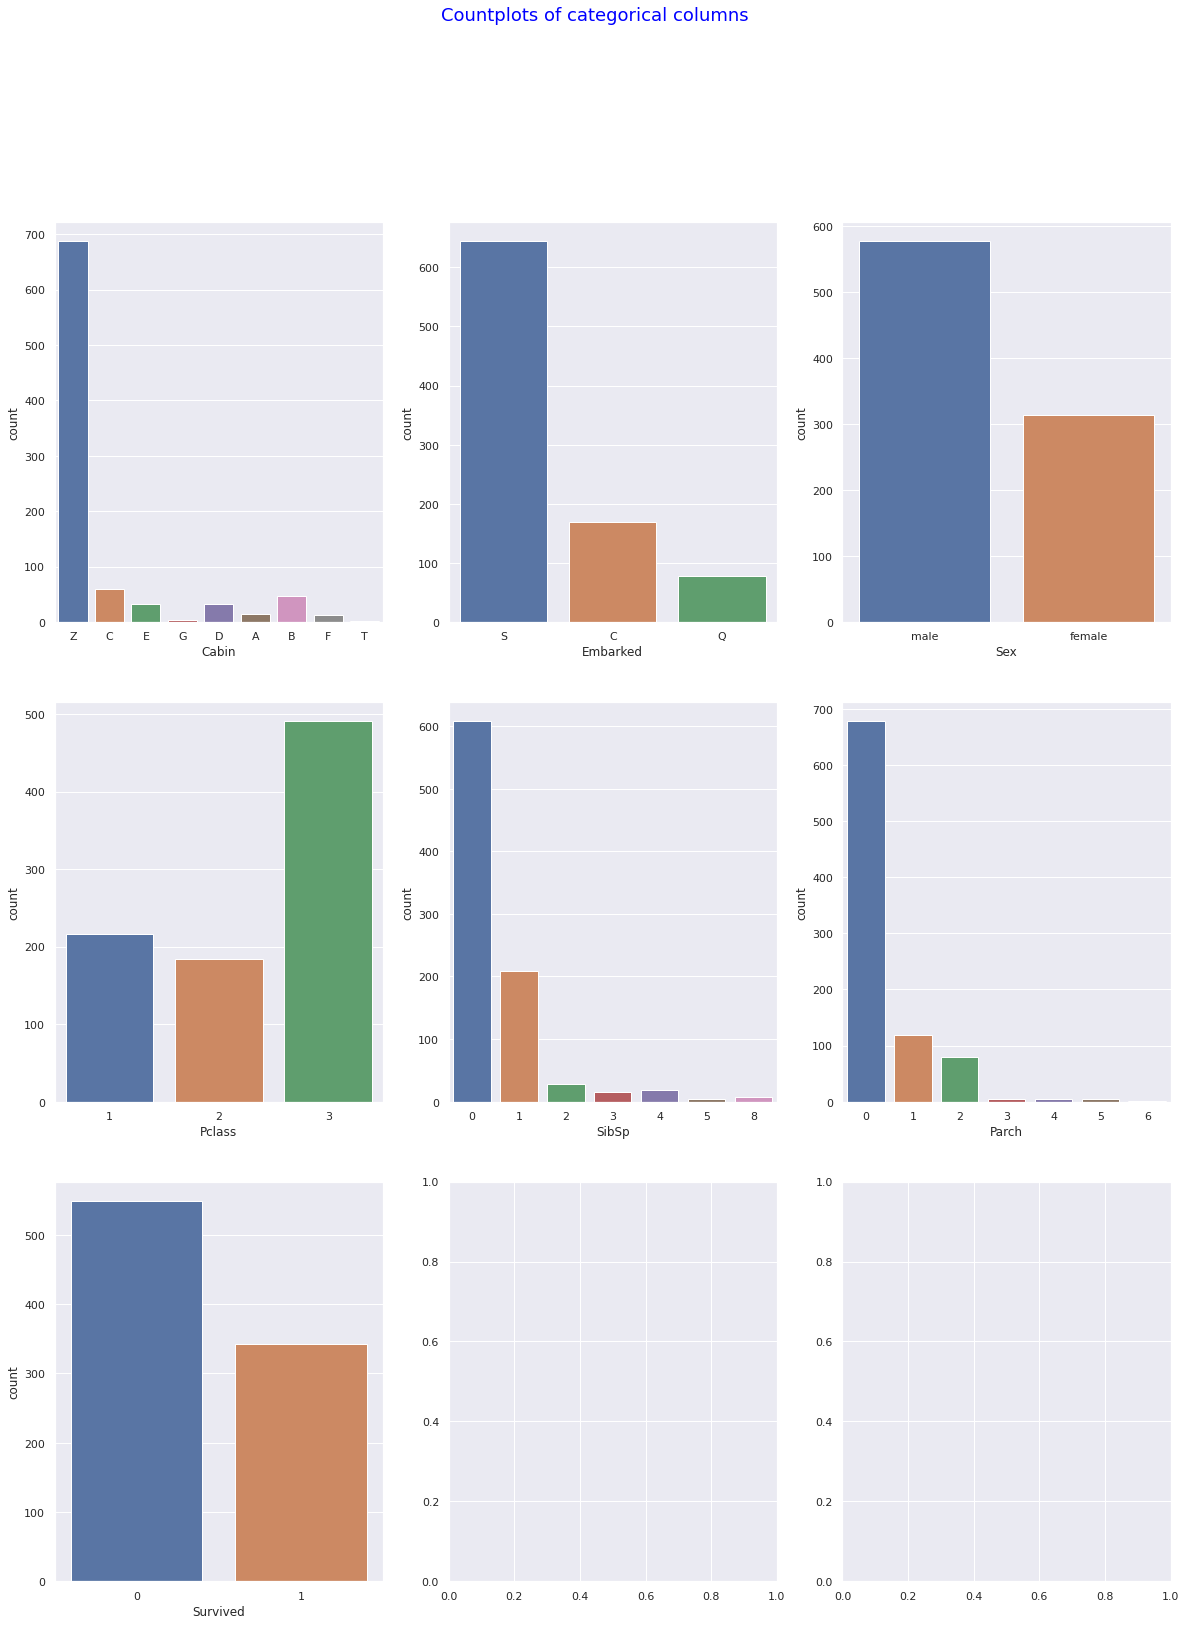

In [222]:
# Plotting the distribution of other categorical columns
# creating a list of the categorical columns in the dataset

cat_cols =['Cabin', 'Embarked','Sex', 'Pclass','SibSp','Parch','Survived' ]


sb.set(style = 'darkgrid', context = 'notebook')

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,25))
plt.suptitle('Countplots of categorical columns', fontsize = 18, y = 1, color = 'blue')
for ax, data, column in zip(axes.flatten(), data_train, cat_cols):
   sb.countplot(data_train[column], ax=ax)

## Bivariate Analysis

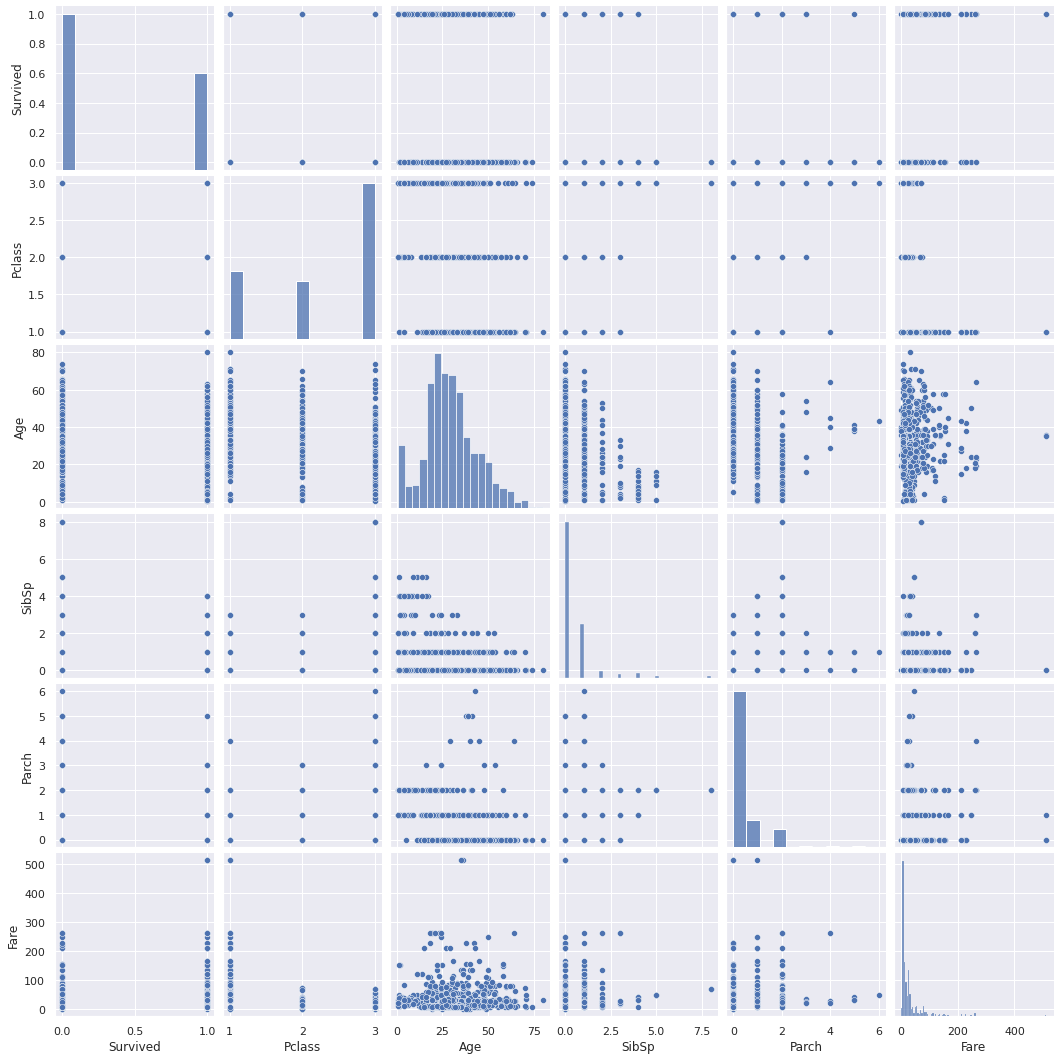

In [223]:
# Use of a pairplot to check for correlation between variables.

sns.pairplot(data_test, kind = 'scatter', dropna = False)
plt.show()

Age VS Survived

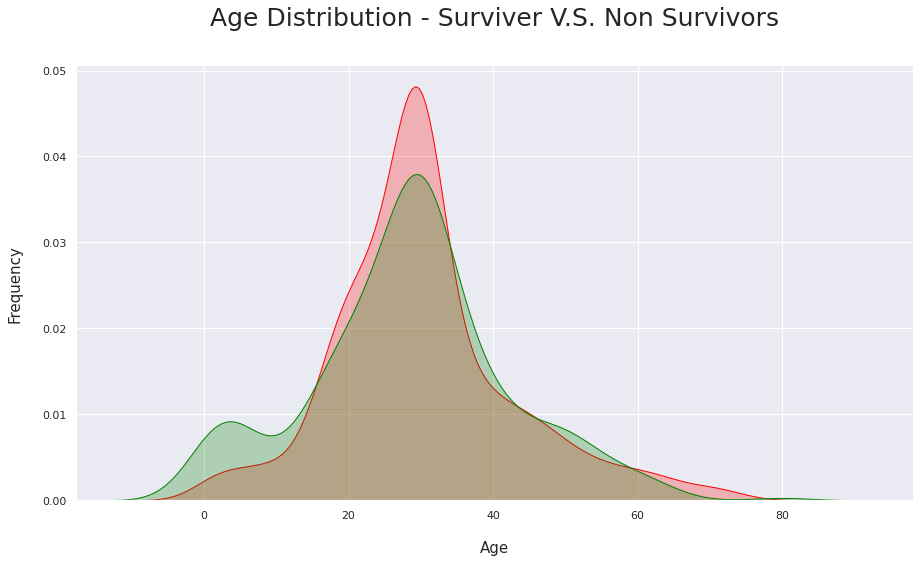

In [225]:
# Checking the distributions of age vs survived

fig = plt.figure(figsize=(15,8),)
ax=sns.kdeplot(data_train.loc[(data_train['Survived'] == 0),'Age'] , color='red',shade=True,label='not survived')
ax=sns.kdeplot(data_train.loc[(data_train['Survived'] == 1),'Age'] , color='green',shade=True, label='survived')
plt.title('Age Distribution - Surviver V.S. Non Survivors', fontsize = 25, pad = 40)
plt.xlabel("Age", fontsize = 15, labelpad = 20)
plt.ylabel('Frequency', fontsize = 15, labelpad= 20);

# Age distribution and survived dirstibution curves are fairly similar.

Correlation

In [226]:
# Displaying the correlations between the variables
corr = data_train.corr()
corr

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


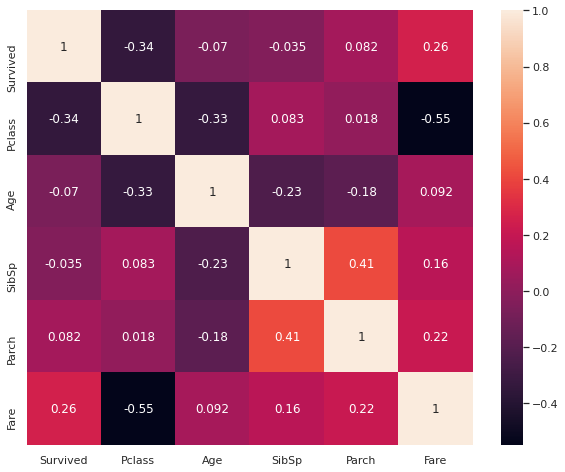

In [227]:
# visualizing the correlation on a heatmap

plt.figure(figsize=(10,8))
sb.heatmap(corr, annot = True)
plt.show()

The dark shaded intersections imply little or no correlation between the two variables while the light sheaded colours imply high correlation between the two variables.

## Feature engineering

Creating a new column to contain the family size

In [231]:
data_train['family_size'] = data_train.SibSp + data_train.Parch+1

# Defining a function to rename the family size
def family(size):
    a = ''
    if (size <= 1):
        a = 'alone'
    elif (size <= 4):
        a = 'wee'
    else:
        a = 'big'
    return a

data_train['family'] = data_train['family_size'].map(family)
data_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,family_size,family
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,Z,S,2,wee
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,C,2,wee
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,Z,S,1,alone
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C,S,2,wee
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,Z,S,1,alone


In [233]:
# Obtaining the fare per person

data_train['calculated_fare'] = data_train.Fare/data_train.family_size

def fare_group(fare):
    a= ''
    if fare <= 4:
        a = 'Very_low'
    elif fare <= 10:
        a = 'low'
    elif fare <= 20:
        a = 'mid'
    elif fare <= 45:
        a = 'high'
    else:
        a = "very_high"
    return a

data_train['fare_group'] = data_train['calculated_fare'].map(fare_group)
data_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,family_size,family,calculated_fare,fare_group
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,Z,S,2,wee,3.62500,Very_low
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,C,2,wee,35.64165,high
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,Z,S,1,alone,7.92500,low
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C,S,2,wee,26.55000,high
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,Z,S,1,alone,8.05000,low


In [236]:
# Creating a new colomn with a name length

data_train['name_length'] = [len(i) for i in data_train.Name]

def name_length_group(size):
    a = ''
    if (size <=20):
        a = 'short'
    elif (size <=35):
        a = 'medium'
    elif (size <=45):
        a = 'long'
    else:
        a = 'X_long'
    return a


data_train['nLength_group'] = data_train ['name_length'].map(name_length_group)
data_train.head()



,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,family_size,family,calculated_fare,fare_group,name_length,nLength_group
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,Z,S,2,wee,3.62500,Very_low,23,medium
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,C,2,wee,35.64165,high,51,X_long
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,Z,S,1,alone,7.92500,low,22,medium
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C,S,2,wee,26.55000,high,44,long
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,Z,S,1,alone,8.05000,low,24,medium


In [238]:
# splitting to train and test sets


train = pd.get_dummies(data_train, columns=["Pclass", 'Sex','Cabin','Embarked','nLength_group', 'family', 'fare_group'], drop_first=False)
train.drop(['family_size','Name', 'Fare','name_length'], axis=1, inplace=True)

Perfoming PCA

In [239]:
#Finding the best principal Components
from sklearn.decomposition import PCA

np.random.seed(0)

X = train.drop('Survived', axis=1)
y = train['Survived']

train_features = X

model = PCA(n_components=5).fit(train_features)

# number of components
n_pcs= model.components_.shape[0]

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = [ 'Age', 'SibSp', 'Parch', 'calculated_fare', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male', 'Cabin_A', 'Cabin_B',
       'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_N',
       'Cabin_T', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'nLength_group_X_long', 'nLength_group_long', 'nLength_group_medium',
       'nLength_group_short', 'family_alone', 'family_big', 'family_wee',
       'fare_group_Very_low', 'fare_group_high', 'fare_group_low',
       'fare_group_mid', 'fare_group_very_high']
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}
# build the dataframe
df = pd.DataFrame(dic.items())
df

,0,1
0,PC0,calculated_fare
1,PC1,Age
2,PC2,SibSp
3,PC3,Pclass_3
4,PC4,Parch


In [240]:
# Getting the variances of the different models

model.explained_variance_ratio_

array([8.83199985e-01, 1.13295000e-01, 1.04727768e-03, 4.72848757e-04,
       3.66893778e-04])

## Modelling
Baseline model - Logistic Regression

In [242]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [243]:
# import LogisticRegression model in python. 

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, accuracy_score
logreg = LogisticRegression(solver='liblinear')

# fit the model with "train_x" and "train_y"
logreg.fit(X_train,y_train) 
y_pred = logreg.predict(X_test)

# Once predicted we save that outcome in "y_pred" variable.
# Then we compare the predicted value( "y_pred") and actual value("test_y") to see how well our model is performing. 

print ("The accuracy Score is: {}".format(round(accuracy_score(y_pred, y_test),5)))

The accuracy Score is: 0.80447


The accuracy of our baseline model which is the logistic regression is 80.447%. The other regressions will be compared to this baseline regression model.

Obtaining the confusion matrix


In [244]:
# Confusion matrix

print(confusion_matrix(y_test, y_pred))


[[97 11]
 [24 47]]


Confusion Matrix Summary

True positive  : 97

True Negative  : 47

False Positive : 11

False Negative : 24

 **KNN: K-Nearest Neighbor**

Approach 1: 80-20 split




In [245]:
# Splitting the data into train and test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [246]:
# Scaling the train set

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [247]:
# Perfoming the regression

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [248]:
# Making predictions

y_pred = classifier.predict(X_test)

In [249]:
# Evaluating the algorithm

from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       105
           1       0.81      0.68      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



In [250]:
# Calculating the accuracy of this model

accuracy_score(y_test, y_pred)

0.7988826815642458

The accuracy of the second model is 79.88% which is lower than that of the baseline model (logistic regression)

Printing the confusion matrix

In [251]:
# Printing the confusion matrix

print(confusion_matrix(y_test, y_pred))

[[93 12]
 [24 50]]


Confusion Matrix Summary

True positive  : 93

True Negative  : 50

False Positive : 12

False Negative : 24

Approach 2: 70-30 split


In [252]:
# Splitting the data into train and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [253]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [255]:
# making predictions

y_pred = classifier.predict(X_test)

# Evaluating the algorithm 

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.89      0.82       160
           1       0.79      0.59      0.68       108

    accuracy                           0.77       268
   macro avg       0.78      0.74      0.75       268
weighted avg       0.77      0.77      0.76       268



In [256]:
# Checking the accuracy

accuracy_score(y_test, y_pred)

0.7723880597014925

The accuracy of this split model is 77.23%

In [257]:
# Getting the confusion matrix

print(confusion_matrix(y_test, y_pred))

[[143  17]
 [ 44  64]]


Confusion Matrix Summary

True positive  : 143

True Negative  : 64

False Positive : 17

False Negative : 44

Approach 3: 60-40 split


In [258]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [259]:
# Making predictions

y_pred = classifier.predict(X_test)

In [260]:
# Evaluationg the algorithm

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.88      0.81       216
           1       0.75      0.55      0.63       141

    accuracy                           0.75       357
   macro avg       0.75      0.72      0.72       357
weighted avg       0.75      0.75      0.74       357



In [262]:
# Calculating the accuracy

accuracy_score(y_test, y_pred)

0.7507002801120448

The accuracy of this split model is 75.07, it has been observed that as the splits continue getting close to the half mark, the accuracy of the model in turn reduces.

In [263]:
# Printing confusion matrix

print(confusion_matrix(y_test, y_pred))

[[191  25]
 [ 64  77]]


Confusion Matrix Summary


True positive  : 191

True Negative  : 77

False Positive : 25

False Negative : 64

## Naive Bayes Classifier 

In [264]:
# Splitting our data into a training set and a test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=6)

In [265]:
# Training our model

clf = GaussianNB()  
model = clf.fit(X_train, y_train)

In [266]:
# Making our predictions

predicted = model.predict(X_test)
print(np.mean(predicted == y_test))

0.7798507462686567


The accuracy of the naive bayes model is 77.985%. this accuracy is close to knn model of 70-30 split.

## Challenging the solution

### Dimensional Reduction

PCA





In [267]:
df

,0,1
0,PC0,calculated_fare
1,PC1,Age
2,PC2,SibSp
3,PC3,Pclass_3
4,PC4,Parch


In [268]:
 #Modelling using the first 10 principal components
 
X1 = X[['Age', 'SibSp', 'Parch', 'calculated_fare','Pclass_3']]
X1.head(5)

,Age,SibSp,Parch,calculated_fare,Pclass_3
0,22.0,1,0,3.62500,1
1,38.0,1,0,35.64165,0
2,26.0,0,0,7.92500,1
3,35.0,1,0,26.55000,0
4,35.0,0,0,8.05000,1


KNN

In [269]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.20)

In [270]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [271]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [272]:
# Making predictions

y_pred = classifier.predict(X_test)

In [273]:
# Evaluating the Algorithm

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.75      0.77       117
           1       0.57      0.63      0.60        62

    accuracy                           0.71       179
   macro avg       0.68      0.69      0.69       179
weighted avg       0.72      0.71      0.71       179



In [274]:
# Checking the accuracy

accuracy_score(y_test, y_pred)

0.7094972067039106

The accuracy of this KNN model is 70.95%

In [276]:
# Getting the confusion matrix

print(confusion_matrix(y_test, y_pred))


[[88 29]
 [23 39]]


Confusion Matrix Summary

True positive  : 88

True Negative  : 39

False Positive : 29

False Negative : 23

Naive Bayes

In [278]:
# Splitting our data into a training set and a test set

X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, random_state=6)

In [279]:
# Training our model

clf = GaussianNB()  
model = clf.fit(X_train, y_train)

In [280]:
# Making predictions

predicted = model.predict(X_test)
print(np.mean(predicted == y_test))

0.7201492537313433


Naive Bayes has an accuracy of 72.01%

Approach 2: LDA

In [281]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split

A_train, A_test, b_train, b_test = train_test_split(X, y, test_size=0.2, random_state=0)
A_train, A_test, b_train, b_test

(           Age  SibSp  ...  fare_group_mid  fare_group_very_high
 140  29.699118      0  ...               0                     0
 439  31.000000      0  ...               1                     0
 817  31.000000      1  ...               1                     0
 378  20.000000      0  ...               0                     0
 491  21.000000      0  ...               0                     0
 ..         ...    ...  ...             ...                   ...
 835  39.000000      1  ...               0                     0
 192  19.000000      1  ...               0                     0
 629  29.699118      0  ...               0                     0
 559  36.000000      1  ...               0                     0
 684  60.000000      1  ...               1                     0
 
 [712 rows x 33 columns],
            Age  SibSp  ...  fare_group_mid  fare_group_very_high
 495  29.699118      0  ...               1                     0
 648  29.699118      0  ...               0     

In [282]:
# Normalization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
A_train = sc.fit_transform(A_train)
A_test = sc.transform(A_test)

In [283]:
# Performing LDA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)
A_train = lda.fit_transform(A_train, b_train)
A_test = lda.transform(A_test)

In [284]:
# Training and Making Predictions

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(A_train, b_train)
b_pred = classifier.predict(A_test)

In [287]:
# Evaluating the Performance

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print(confusion_matrix(b_test, b_pred))

print('Accuracy  ' + str (accuracy_score(b_test, b_pred)))

[[97 13]
 [19 50]]
Accuracy  0.8212290502793296


After LDA, the model has an accuracy of 82 %

Confusion Matrix Summary

True positive  : 97

True Negative  : 50

False Positive : 13

False Negative : 19

Modelling Summary

Model                : Accuracy Score
    
Logistrc Regression : 80.4 %

KNN                

                    : 80 % using the 80 - 20 split

                    :77.23% using 70 - 30 split

                    :75.07% using 60 - 40 split

Naive Bayes         : 77.99%

After PCA           : 70.9 %

After LDA                 : 82.12%

Therefore the model with the highest accuracy in this case is the model obtained after perfoming LDA.

It is followed by the baseline model which is the logistic regression model.

## Follow-up Questions

**1. Was the objective of the project achieved?**

The objective of the project was achieved since predictions of 82% accuracy can be made
based on the data that is available

**2. Was the data sufficient to achieve the objective?**

The data was sufficiently enough to achieve the objective of coming up with a model that is fairly accurate

**3. Is there need for more data?**

Yes, Feature Engineering may be done to uncover more patterns in the data 
that may improve the model accuracy.